<a href="https://colab.research.google.com/github/manohar0720/Lungcancer/blob/main/Eye_Cls_Copy_of_Manohar_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import cv2
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import PIL
import os

In [ ]:
# import each path of the image classes
glaucoma = Path('/content/drive/MyDrive/Dataset/glaucoma')
cataract = Path('/content/drive/MyDrive/Dataset/cataract')
normal = Path('/content/drive/MyDrive/Dataset/normal')
diabetic_retinopathy = Path('/content/drive/MyDrive/Dataset/diabetic_retinopathy')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create a dataframe with the file path and the labels
disease_type = [glaucoma, cataract,normal,diabetic_retinopathy]
df = pd.DataFrame()
from tqdm import tqdm
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc= str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)],'disease_type': [disease_type.index(types)]})], ignore_index=True)

/content/drive/MyDrive/Dataset/normal: 100%|██████████| 1074/1074 [00:00<00:00, 1755.78it/s]
/content/drive/MyDrive/Dataset/diabetic_retinopathy: 100%|██████████| 1098/1098 [00:00<00:00, 1878.06it/s]


In [ ]:
# display dataframes
df

,image,disease_type
0,/content/drive/MyDrive/Dataset/glaucoma/1213_r...,0
1,/content/drive/MyDrive/Dataset/glaucoma/1225_r...,0
2,/content/drive/MyDrive/Dataset/glaucoma/1214_r...,0
3,/content/drive/MyDrive/Dataset/glaucoma/1222_r...,0
4,/content/drive/MyDrive/Dataset/glaucoma/1209_r...,0
...,...,...
4221,/content/drive/MyDrive/Dataset/diabetic_retino...,3
4222,/content/drive/MyDrive/Dataset/diabetic_retino...,3
4223,/content/drive/MyDrive/Dataset/diabetic_retino...,3
4224,/content/drive/MyDrive/Dataset/diabetic_retino...,3


In [ ]:
# check the count of the target label
df.disease_type.value_counts()

disease_type
3    1098
2    1074
1    1038
0    1016
Name: count, dtype: int64

In [ ]:
# define function to plot sample images
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()

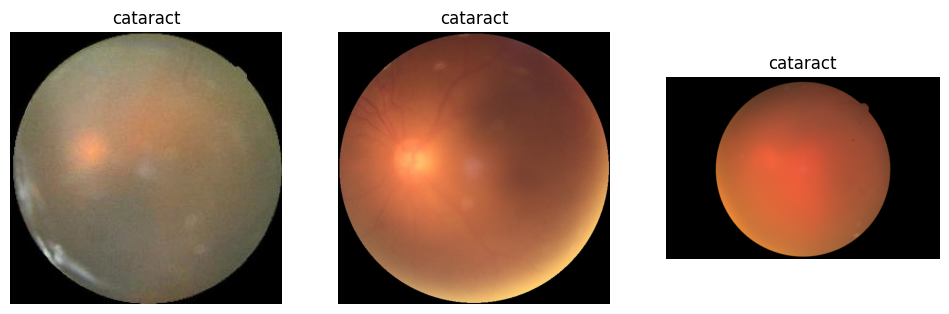

In [ ]:
plot_image(1)

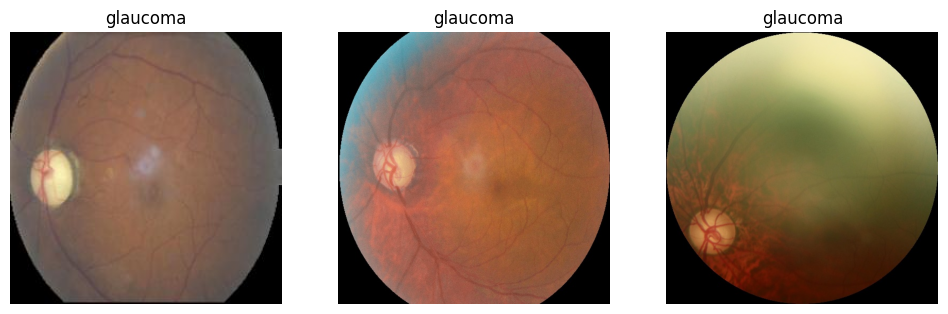

In [ ]:
plot_image(0)

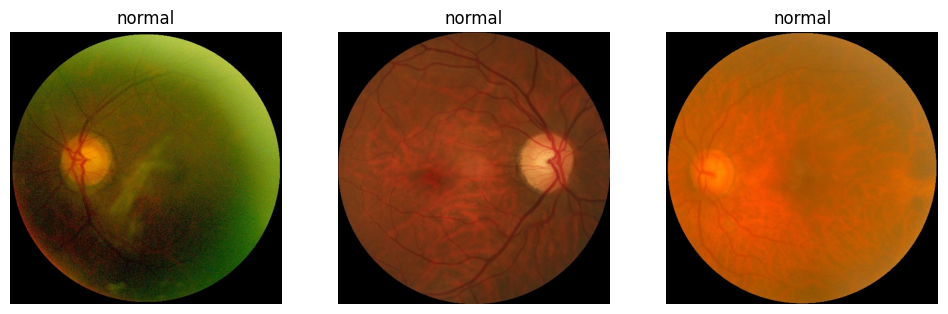

In [ ]:
plot_image(2)

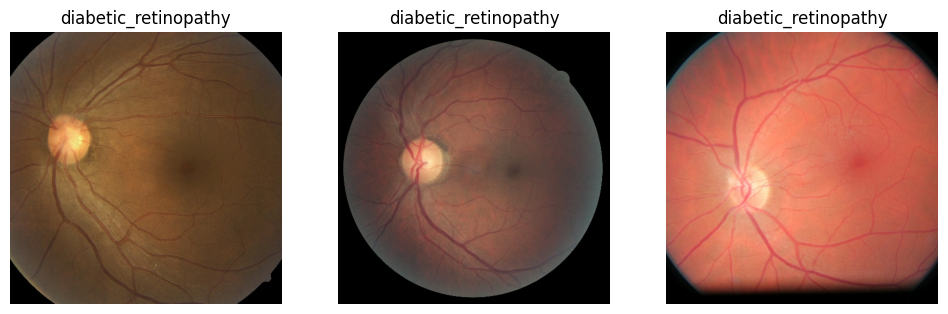

In [ ]:
plot_image(3)

In [ ]:
# map the labels to the disease type
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})

In [ ]:
# check the lebel count to verify it has been mapped
df.disease_type.value_counts()

disease_type
diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1016
Name: count, dtype: int64

In [ ]:
# randomising the dataset
df1 = df.sample(frac=1).reset_index(drop=True)

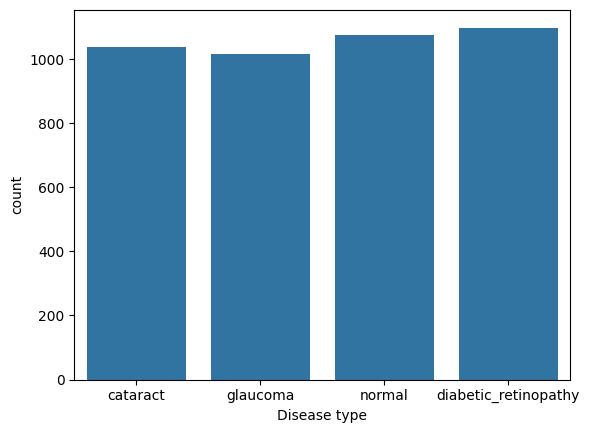

In [ ]:
# create a countplot of the disease type
sns.countplot(x = 'disease_type', data = df1)
plt.xlabel("Disease type")
plt.show()

In [ ]:
#import necessary libraries for the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# augumentation of images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [ ]:
# create the train data
train_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

Found 3381 validated image filenames belonging to 4 classes.


In [ ]:
# create the validation data
valid_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = False,
                                          subset = 'validation')

Found 845 validated image filenames belonging to 4 classes.


In [ ]:
labels=[key for key in train_data.class_indices]
num_classes = len(disease_type)

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224,224, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [ ]:
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

x = GlobalAveragePooling2D()(model.output)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=model.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
his = model.fit(train_data, epochs=30, validation_data=valid_data)
#model.evaluate(test_data)


Epoch 1/30
106/106 [==============================] - 87s 512ms/step - loss: 0.4048 - accuracy: 0.8512 - val_loss: 1.3711 - val_accuracy: 0.6272
Epoch 2/30
106/106 [==============================] - 53s 497ms/step - loss: 0.2245 - accuracy: 0.9160 - val_loss: 0.2903 - val_accuracy: 0.8876
Epoch 3/30
106/106 [==============================] - 52s 490ms/step - loss: 0.1652 - accuracy: 0.9429 - val_loss: 0.2257 - val_accuracy: 0.9124
Epoch 4/30
106/106 [==============================] - 52s 490ms/step - loss: 0.1240 - accuracy: 0.9547 - val_loss: 0.3009 - val_accuracy: 0.8947
Epoch 5/30
106/106 [==============================] - 50s 472ms/step - loss: 0.1102 - accuracy: 0.9645 - val_loss: 0.3173 - val_accuracy: 0.9053
Epoch 6/30
106/106 [==============================] - 52s 488ms/step - loss: 0.0889 - accuracy: 0.9716 - val_loss: 0.3458 - val_accuracy: 0.8959
Epoch 7/30
106/106 [==============================] - 51s 483ms/step - loss: 0.0636 - accuracy: 0.9787 - val_loss: 0.4478 - val_ac

In [ ]:
'''
# fitting the model
his = model.fit(
  train_data,
    validation_data=valid_data,
  epochs=15
)
'''

'\n# fitting the model\nhis = model.fit(\n  train_data,\n    validation_data=valid_data,\n  epochs=15\n)\n'

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_11 (Rescaling)    (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_11[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_12 (Rescaling)    (None, 224, 224, 3)          0         ['normalization_5[0][0]'

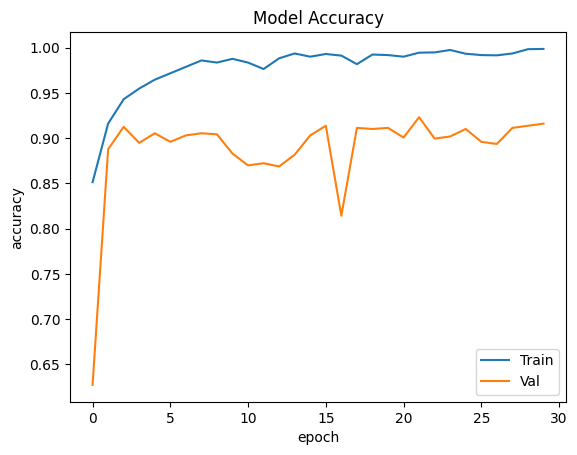

In [ ]:
# create a plot of accuracy and val_acuracy for each epoch
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

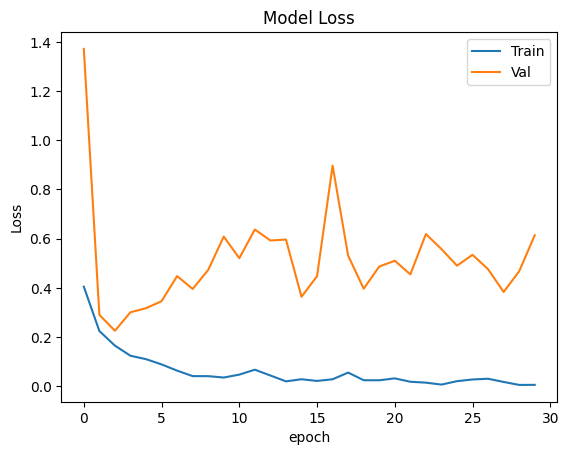

In [ ]:
# create a plot of loss and val_loss for each epoch
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [ ]:
# evaluate the model
y_test = valid_data.classes
y_pred = model.predict(valid_data)
y_pred = np.argmax(y_pred,axis=1)

27/27 [==============================] - 9s 322ms/step


In [ ]:
# generate classification report of the model
print(classification_report(y_test,y_pred,target_names = labels))

                      precision    recall  f1-score   support

            cataract       0.96      0.91      0.93       211
diabetic_retinopathy       1.00      0.99      1.00       208
            glaucoma       0.91      0.82      0.86       206
              normal       0.82      0.94      0.87       220

            accuracy                           0.92       845
           macro avg       0.92      0.92      0.92       845
        weighted avg       0.92      0.92      0.92       845



In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

91.59763313609467


In [58]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred))
cm

array([[193,   0,   7,  11],
       [  0, 206,   0,   2],
       [  4,   0, 169,  33],
       [  5,   0,   9, 206]])

In [59]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model('/content/my_model.h5')


In [67]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#load the image using keras
img = load_img('/content/_58_180622.jpg', target_size=(224,224))

img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array = img_array.reshape(-1, 224, 224, 3)
predict = model.predict(img_array)

1/1 [==============================] - 0s 27ms/step


In [68]:
max_index = np.argmax(predict)

In [69]:
res = max_index
if res == 0:
  print ("Cataract")
elif res == 1:
  print ("Diabetic retinopathy")
elif res == 2:
  print ("Glaucoma")
elif res == 3:
  print("Normal")

Glaucoma
